# **PREDIKSI DATASET STUNTING APLIKASI KIDCARE**

In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from google.colab import drive, files

# **LOAD DATASET**

In [580]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [581]:
file_path = '/content/drive/MyDrive/KidCare/dataset/Dataset_Stunting.csv'
df = pd.read_csv(file_path)
print(df.head())

   umur Jenis Kelamin  Berat Badan  Panjang Badan  Lingkar Kepala Keterangan
0     0     Laki Laki          2.0           50.0            30.0   stunting
1     0     Laki Laki          1.0           45.0            36.0   stunting
2     0     Laki Laki          4.0           41.0            32.0   stunting
3     0     Laki Laki          2.0           43.0            34.0   stunting
4     0     Laki Laki          2.0           47.0            30.0   stunting


# **PREPROCESSING**

In [582]:
# Display dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   umur            6000 non-null   int64  
 1   Jenis Kelamin   6000 non-null   object 
 2   Berat Badan     6000 non-null   float64
 3   Panjang Badan   6000 non-null   float64
 4   Lingkar Kepala  6000 non-null   float64
 5   Keterangan      6000 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 281.4+ KB


In [583]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
umur              0
Jenis Kelamin     0
Berat Badan       0
Panjang Badan     0
Lingkar Kepala    0
Keterangan        0
dtype: int64


In [584]:
# Check for duplicates
print("\nNumber of Duplicates:", df.duplicated().sum())
df.describe()


Number of Duplicates: 210


,umur,Berat Badan,Panjang Badan,Lingkar Kepala
count,6000.000000,6000.000000,6000.000000,6000.000000
mean,30.030833,12.551399,90.543056,34.841102
std,17.752720,4.669063,19.274193,1.968745
min,0.000000,1.000000,40.000000,30.000000
25%,14.750000,9.000000,77.000000,34.000000
50%,30.500000,13.000000,90.000000,35.000000
75%,45.250000,16.041012,106.504856,36.053462
max,60.000000,26.011980,130.888663,39.207424


In [585]:
# Remove duplicate entries
df = df.drop_duplicates()
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [586]:
# Rename columns for better readability
df = df.rename(columns={
    'umur': 'Umur',
    'Keterangan': 'Status Gizi',
    'Panjang Badan': 'Tinggi Badan'
})

df.head(50)

,Umur,Jenis Kelamin,Berat Badan,Tinggi Badan,Lingkar Kepala,Status Gizi
0,0,Laki Laki,2.0,50.0,30.0,stunting
1,0,Laki Laki,1.0,45.0,36.0,stunting
2,0,Laki Laki,4.0,41.0,32.0,stunting
3,0,Laki Laki,2.0,43.0,34.0,stunting
4,0,Laki Laki,2.0,47.0,30.0,stunting
5,0,Laki Laki,1.0,46.0,33.0,stunting
6,0,Laki Laki,2.0,52.0,32.0,stunting
7,0,Laki Laki,3.0,44.0,36.0,stunting
8,0,Laki Laki,4.0,47.0,35.0,tidak stunting
9,0,Laki Laki,2.0,48.0,32.0,stunting


# **EXPLORATORY DATA ANALYSIS (EDA)**

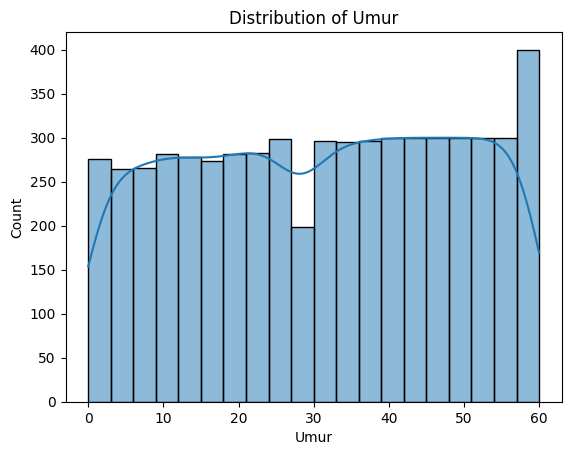

In [587]:
# EDA 1 (Visualize the distribution of Umur)
sns.histplot(df['Umur'], bins=20, kde=True)
plt.title('Distribution of Umur')
plt.show()

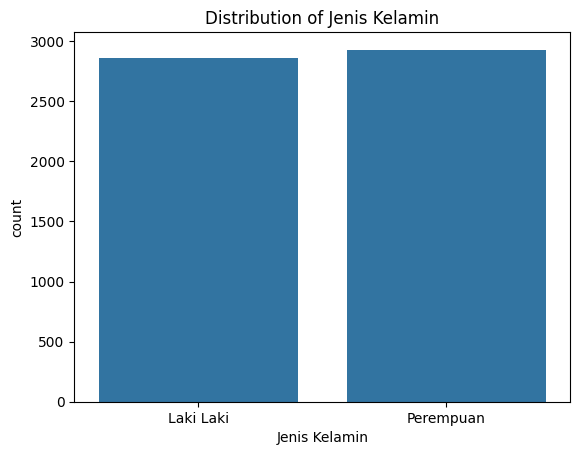

In [588]:
# EDA 2 (Visualize the distribution of Jenis Kelamin)
sns.countplot(x='Jenis Kelamin', data=df)
plt.title('Distribution of Jenis Kelamin')
plt.show()

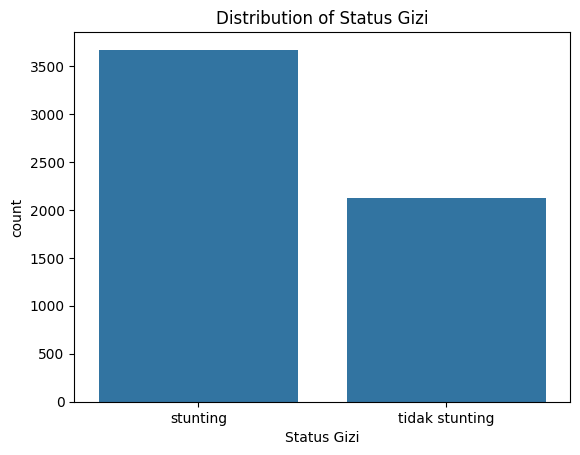

In [589]:
# EDA 4
sns.countplot(x='Status Gizi', data=df)
plt.title('Distribution of Status Gizi')
plt.show()

In [590]:
df.shape

(5790, 6)

5790 baris (data observasi atau entri)
6 kolom (fitur atau variabel yang ada pada data)

# **MODEL ARCHITECTURE KIDCARE USING DNN**

In [591]:
print(df['Jenis Kelamin'].unique())
print(df['Status Gizi'].unique())

['Laki Laki' 'Perempuan']
['stunting' 'tidak stunting']


In [592]:
Jenis_Kelamin_encoding = {'Laki Laki': 1, 'Perempuan': 0}
Status_Gizi_encoding = {'tidak stunting': 0, 'stunting': 1}

df['Jenis Kelamin'] = df['Jenis Kelamin'].map(Jenis_Kelamin_encoding)
df['Status Gizi'] = df['Status Gizi'].map(Status_Gizi_encoding)

df.head(6000)

,Umur,Jenis Kelamin,Berat Badan,Tinggi Badan,Lingkar Kepala,Status Gizi
0,0,1,2.000000,50.000000,30.000000,1
1,0,1,1.000000,45.000000,36.000000,1
2,0,1,4.000000,41.000000,32.000000,1
3,0,1,2.000000,43.000000,34.000000,1
4,0,1,2.000000,47.000000,30.000000,1
...,...,...,...,...,...,...
5995,60,1,20.106457,126.767979,36.710539,0
5996,60,1,18.861031,120.068332,35.453501,1
5997,60,0,20.344202,124.599594,35.844523,0
5998,60,0,18.855528,121.317698,34.970383,1


In [593]:
# Fitur (X) dan target (y)
X = df[['Jenis Kelamin', 'Umur', 'Berat Badan', 'Tinggi Badan', 'Lingkar Kepala']].values
y = df['Status Gizi'].values

# Cek dimensi data
print("Dimensi X:", X.shape)
print("Dimensi y:", y.shape)

Dimensi X: (5790, 5)
Dimensi y: (5790,)


In [594]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Normalisasi data
X_resampled = scaler.fit_transform(X_resampled)

# Cek data setelah normalisasi
print("Contoh data setelah normalisasi:")
print(X_resampled[:5])

Contoh data setelah normalisasi:
[[1.         0.         0.03998084 0.11002472 0.        ]
 [1.         0.         0.         0.05501236 0.65164804]
 [1.         0.         0.11994252 0.01100247 0.21721601]
 [1.         0.         0.03998084 0.03300742 0.43443203]
 [1.         0.         0.03998084 0.07701731 0.        ]]


In [595]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Cek dimensi data setelah split
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)

Dimensi X_train: (5870, 5)
Dimensi X_test: (1468, 5)


In [596]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Cek dimensi setelah oversampling
print("Dimensi X setelah SMOTE:", X_resampled.shape)
print("Distribusi y setelah SMOTE:", np.bincount(y_resampled))

Dimensi X setelah SMOTE: (7338, 5)
Distribusi y setelah SMOTE: [3669 3669]


In [597]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definisikan model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Aktivasi sigmoid untuk binary classification
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32)

Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6036 - loss: 0.6706 - val_accuracy: 0.6751 - val_loss: 0.6022
Epoch 2/150
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6843 - loss: 0.5885 - val_accuracy: 0.7234 - val_loss: 0.5412
Epoch 3/150
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 0.5252 - val_accuracy: 0.7187 - val_loss: 0.5377
Epoch 4/150
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.4951 - val_accuracy: 0.7888 - val_loss: 0.4625
Epoch 5/150
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7824 - loss: 0.4589 - val_accuracy: 0.8113 - val_loss: 0.4290
Epoch 6/150
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4246 - val_accuracy: 0.8454 - val_loss: 0.3958
Epoch 7/150
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.3833 - val_accuracy: 0.8474 - val_loss: 0.3775
Epoch 8/150
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3559 - val_accuracy: 0.8495

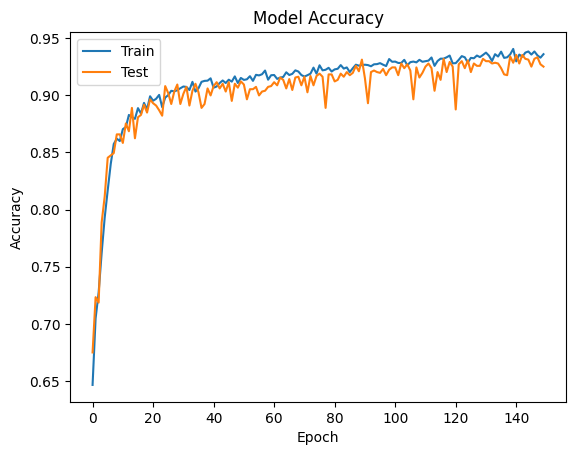

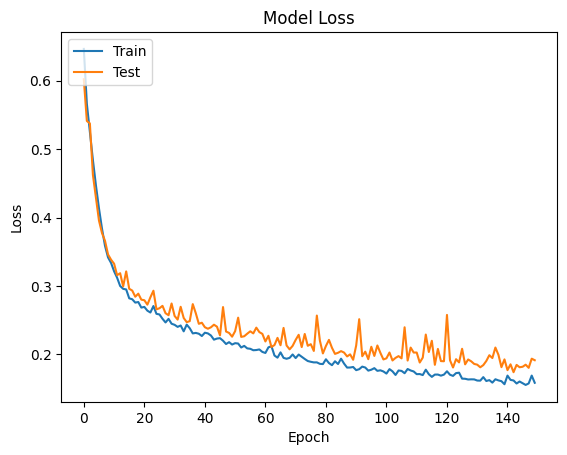

In [598]:
#grafik check train n test
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [599]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,493 (29.27 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,996 (19.52 KB)

# **EVALUASI MODEL**

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


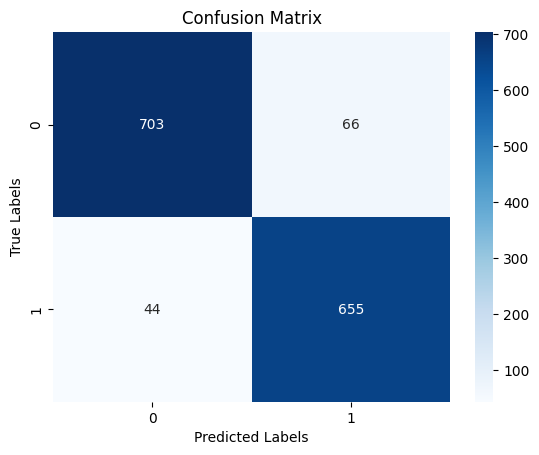

In [600]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert continuous variable to binary labels
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Create the confusion matrix
confusion = confusion_matrix(y_pred_binary, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Blues", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()


In [601]:
# Evaluasi model pada data pengujian
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.1890
Test Accuracy: 0.9251


In [602]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the metrics report
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Precision: 0.9370529327610873
Recall: 0.9084604715672677
F1 Score: 0.9225352112676056
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       747
           1       0.94      0.91      0.92       721

    accuracy                           0.93      1468
   macro avg       0.93      0.92      0.92      1468
weighted avg       0.93      0.93      0.93      1468



In [608]:
threshold = 0.5  # Bisa dicoba dengan threshold yang lebih tinggi
prediction = model.predict(np.array([[60, 1, 17, 110, 30]]))
print(f"Prediksi untuk input kedua: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediksi untuk input kedua: [[0.]]


In [609]:
threshold = 0.5  # Bisa dicoba dengan threshold yang lebih tinggi
prediction = model.predict(np.array([[0, 1, 2, 47, 30]]))
print(f"Prediksi untuk input kedua: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediksi untuk input kedua: [[1.]]


In [604]:
#tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpk4xtfb9c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_134')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139733981474912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139733980645856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139733980659408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139733980795600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139733980792256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139733980793664: TensorSpec(shape=(), dtype=tf.resource, name=None)
